# Pre-procesado de datos.

En este documento analizaremos los datos antes de entrenarlos.

Importamos las liberías empleadas en este análisis.

In [1]:
# Importar bibliotecas para manipulación de datos
import os
import pandas as pd
import numpy as np
import pickle

# Importar bibliotecas para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de preprocesamiento
from sklearn.preprocessing import LabelEncoder

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Importamos nuestros datos.

In [2]:
# Creamos un DataFrame de nuestros datos.
car_data = pd.read_csv('../data/cars.csv', sep=';')

# Mostramos la forma y los primeros registros de nuestro DataFrame.
print(car_data.shape)
car_data.head()

(58049, 25)


,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,...,REV_Garantia,Averia_grave,QUEJA_CAC,EDAD_COCHE,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad Cliente,Tiempo
0,CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,...,NO DATA,Averia muy grave,SI,2.08,2892,0,0,2,18,0
1,CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,...,SI,No,NO,2.45,1376,7187,0,2,53,0
2,CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,...,NO DATA,No,NO,2.51,1376,0,1,4,21,3
3,CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,...,SI,Averia muy grave,SI,2.43,2015,7256,1,4,48,5
4,CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,...,NO DATA,No,NO,2.30,1818,0,1,3,21,3


Vemos qué valores nulos hay en nuestro DataFrame.

In [3]:
# Revisamos si hay valores nulos en nuestro DataFrame.
valores_nulos = car_data.isnull().sum()

# Mostramos los valores nulos.
valores_nulos

CODE                   0
PRODUCTO               0
TIPO_CARROCERIA        0
COMBUSTIBLE            0
Potencia_              0
TRANS                  0
FORMA_PAGO             0
ESTADO_CIVIL         890
GENERO               860
OcupaciOn              0
PROVINCIA              0
Campanna1              0
Campanna2              0
Campanna3              0
Zona _Renta        13178
REV_Garantia           0
Averia_grave           1
QUEJA_CAC              0
EDAD_COCHE             0
COSTE_VENTA            0
km_anno                0
Mas_1_coche            0
Revisiones             0
Edad Cliente           0
Tiempo                 0
dtype: int64

Debido a que las columnas con datos nulos son categóricas y pueden tomar tan solo ciertos valores, sustituimos los valores nulos por la moda.

In [4]:
# Función para sustituir los valores nulos en las columnas especificadas por la moda (valor más frecuente).
def valores_nulos(df, columnas):
    for columna in columnas:
        if columna in df.columns:  # Verificar si la columna existe en el DataFrame
            if df[columna].isnull().any():  # Solo si hay valores nulos
                try:
                    # Obtener la moda (valor más frecuente)
                    moda = df[columna].mode()[0]  # Usar [0] para seleccionar el primer valor en caso de múltiples modos
                    df[columna].fillna(moda, inplace=True)
                except IndexError:
                    print(f"No se pudo obtener la moda para la columna: {columna}")
            else:
                print(f"No hay valores nulos en la columna: {columna}")
        else:
            print(f"La columna '{columna}' no existe en el DataFrame")
    return df

In [5]:
# Aplicamos la función a car_data.
columnas_nulos = ['ESTADO_CIVIL', 'GENERO', 'Zona _Renta', 'Averia_grave']
car_data = valores_nulos(car_data, columnas_nulos)

Verificamos que se hayan hecho los cambios correctamente.

In [6]:
# Calculamos de nuevo los valores nulos en nuestro DataFrame.
valores_nulos = car_data.isnull().sum()

# Mostramos los valores nulos.
valores_nulos

CODE               0
PRODUCTO           0
TIPO_CARROCERIA    0
COMBUSTIBLE        0
Potencia_          0
TRANS              0
FORMA_PAGO         0
ESTADO_CIVIL       0
GENERO             0
OcupaciOn          0
PROVINCIA          0
Campanna1          0
Campanna2          0
Campanna3          0
Zona _Renta        0
REV_Garantia       0
Averia_grave       0
QUEJA_CAC          0
EDAD_COCHE         0
COSTE_VENTA        0
km_anno            0
Mas_1_coche        0
Revisiones         0
Edad Cliente       0
Tiempo             0
dtype: int64

Ya no tenemos ningún dato nulo.

Vemos si hay datos duplicados, pues es un paso crucial para garantizar la calidad de los datos y evitar sesgos, errores en los resultados estadísticos, y problemas en los modelos predictivos. 

In [7]:
# Función que devuelva los valores duplicados en un data.

def eliminar_duplicados(df):
    duplicados = df.duplicated().sum()
    print(f"Duplicados encontrados: {duplicados}")
    
    # Elimina duplicados
    df_sin_duplicados = df.drop_duplicates()
    
    return duplicados, df_sin_duplicados

In [8]:
# Datos duplicados de car_data.
duplicados, car_data_sin_duplicados = eliminar_duplicados(car_data)

Duplicados encontrados: 0


Revisamos qué tipos de datos tiene cada columna de nuestro DataFrame.

In [9]:
# Revisamos los tipos de datos de nuestro DataFrame.
tipos_de_datos = car_data.dtypes

# Mostramos los tipos de datos.
tipos_de_datos

CODE                object
PRODUCTO            object
TIPO_CARROCERIA     object
COMBUSTIBLE         object
Potencia_           object
TRANS               object
FORMA_PAGO          object
ESTADO_CIVIL        object
GENERO              object
OcupaciOn           object
PROVINCIA           object
Campanna1           object
Campanna2           object
Campanna3           object
Zona _Renta         object
REV_Garantia        object
Averia_grave        object
QUEJA_CAC           object
EDAD_COCHE         float64
COSTE_VENTA          int64
km_anno              int64
Mas_1_coche          int64
Revisiones           int64
Edad Cliente         int64
Tiempo               int64
dtype: object

Para continuar con nuestro análisis separamos en variables categóricas y variables numéricas.

In [10]:
# Separamos las variables categóricas y numéricas.
categorical = car_data.select_dtypes(include=['object'])
numeric = car_data.select_dtypes(exclude=['object']) # Excluimos las variables categóricas ya que sabemos que el resto de las variables son numéricas.

## Análisis varables numéricas.

In [11]:
# Función para crear una matriz de correlación y su mapa de calor.

def mapa_correlacion(data):
    # Calcular la matriz de correlación.
    correlation_matrix = data.corr()

    # Configurar el tamaño de la figura.
    plt.figure(figsize=(15, 10))
    sns.set(style='white')

    # Crear la máscara para el triángulo superior.
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    # Crear un mapa de colores divergente
    cmap = sns.diverging_palette(0, 10, as_cmap=True)

    # Crear el mapa de calor con los valores de correlación anotados.
    sns.heatmap(correlation_matrix, 
                mask=mask,        # Aplicar la máscara.
                cmap=cmap,        # Mapa de colores.
                annot=True,       # Mostrar los números.
                fmt=".2f",        # Formato a dos decimales.
                vmin=-1, vmax=1,  # Limitar los valores entre -1 y 1.
                center=0,         # Centrar en 0.
                square=True,      # Hacer que los cuadros sean cuadrados.
                linewidths=0.5,   # Ancho de las líneas entre celdas.
                cbar_kws={"shrink": 0.5})  # Tamaño de la barra de color.

    # Mostrar el gráfico.
    plt.show()

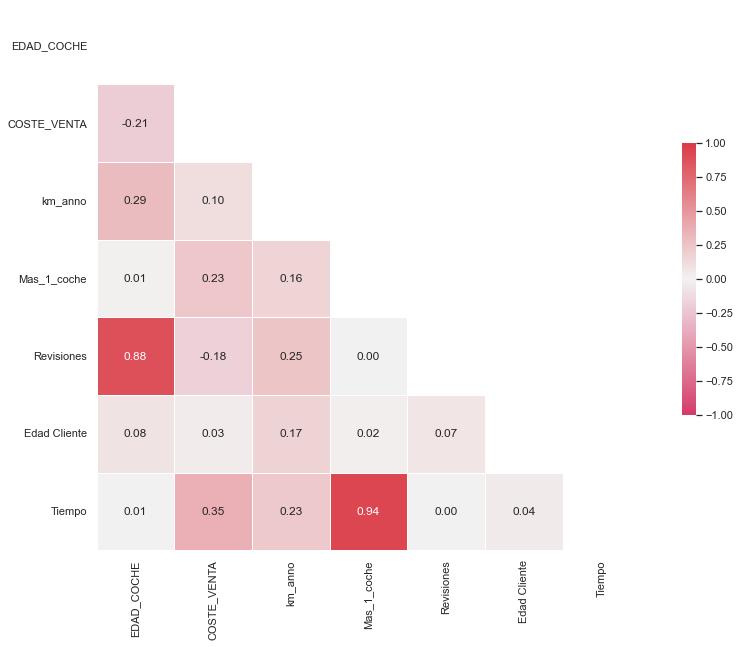

In [12]:
mapa_correlacion(numeric)

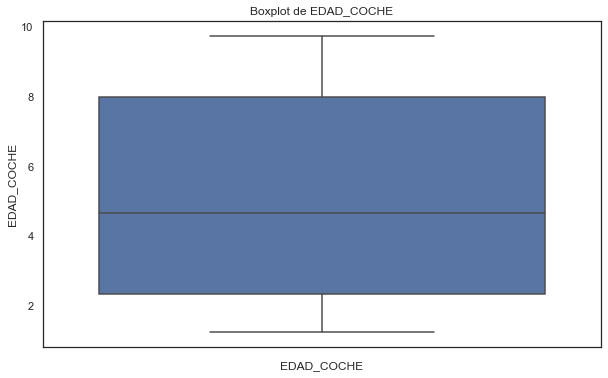

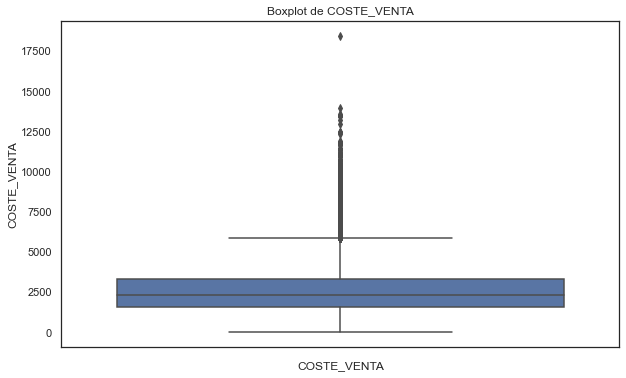

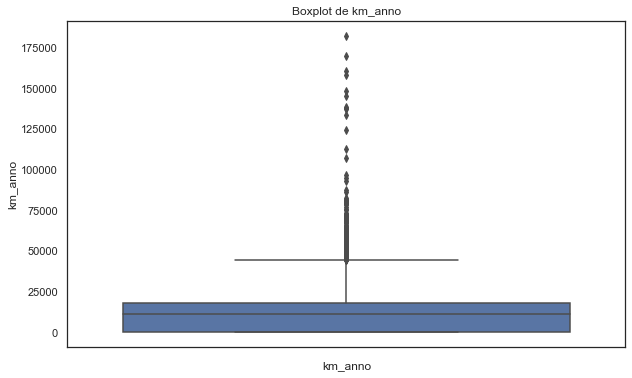

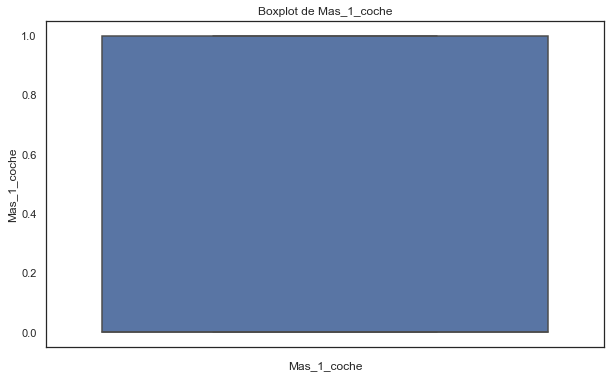

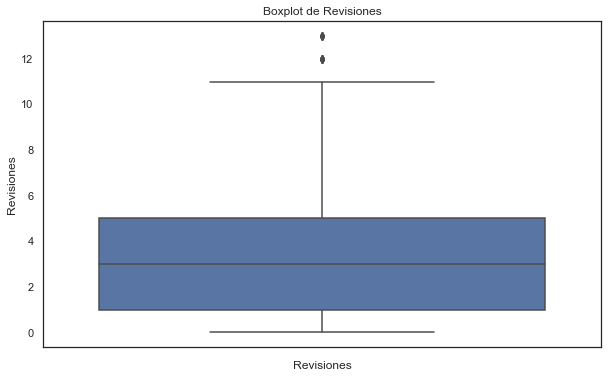

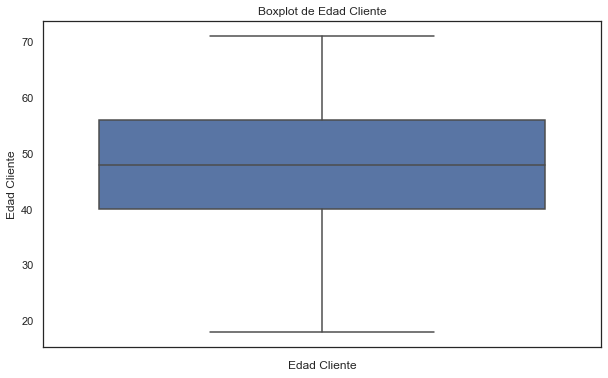

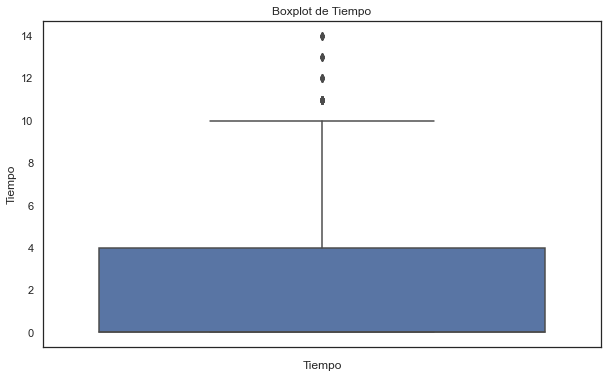

In [13]:
# Crear un boxplot individual para cada columna numérica.
for column in numeric.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=numeric[column])
    plt.title(f"Boxplot de {column}")
    plt.xlabel(column)
    plt.show()

##### Conclusiones sobre cambios a realizar en base a nuestro mapa de correlación y diagramas de caja:

- Podemos eliminar la variable `EDAD_COCHE` ya que las únicas correlaciones altas que tiene es con el número de revisiones y los kilómetros por año, lo cual es de sentido común, pues cuanto más años tiene un coche, más revisiones y kilómetros tiene.
- También eliminamos la variable `Tiempo`.
- Podemos pasar a rangos las variables `COSTE_VENTA` y `KM_ANNO` ya que contiene bastantes outliers.

In [14]:
# Función para eliminar columnas de un DataFrame.

def eliminar_columnas(df, columnas):
    df = df.drop(columnas, axis=1)
    return df

In [15]:
# Aplicamos la función a car_data para eliminar las columnas 'EDAD_COCHE', 'Tiempo'.
columnas_a_eliminar = ['EDAD_COCHE', 'Tiempo']
car_data = eliminar_columnas(car_data, columnas_a_eliminar)
car_data

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,...,Campanna3,Zona _Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad Cliente
0,CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,...,NO,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,0,2,18
1,CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,...,NO,Medio-Bajo,SI,No,NO,1376,7187,0,2,53
2,CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,...,NO,Medio,NO DATA,No,NO,1376,0,1,4,21
3,CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,...,NO,Medio,SI,Averia muy grave,SI,2015,7256,1,4,48
4,CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,...,SI,Alto,NO DATA,No,NO,1818,0,1,3,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58044,CLI57905,F,TIPO3,FUEL 1,Alta,M,Contado,SOLTERO,F,Empresa,...,NO,Alto,SI,Averia muy grave,SI,6832,12528,0,5,38
58045,CLI57926,K,TIPO7,FUEL 1,Alta,A,Contado,CASADO,M,Empresa,...,NO,Medio-Bajo,NO DATA,No,SI,0,22072,0,3,54
58046,CLI57952,K,TIPO7,FUEL 1,Alta,A,Contado,CASADO,M,Empresa,...,NO,Medio,NO DATA,No,NO,0,8352,0,8,63
58047,CLI58038,G,TIPO5,FUEL 2,Media,M,Contado,CASADO,M,Empresa,...,NO,Medio-Bajo,NO DATA,No,NO,2786,10441,0,13,62


In [16]:
# Función para transformar a rangos las variables.

def categorizar_columnas(df, columna, bins, labels):
    # Asegurarse de que la columna es numérica
    df[columna] = pd.to_numeric(df[columna], errors='coerce')
    
    # Crear los rangos en la columna
    df[columna] = pd.cut(df[columna], bins=bins, labels=labels, include_lowest=True)
    
    return df

# Ejemplo 1: Categorizar COSTE_VENTA.
coste_bins = [0, 2000, 3000, 5000, 10000, 21000]
coste_labels = ['0-2k', '2k-3k', '3k-5k', '5k-10k', '10k-21k']
car_data = categorizar_columnas(car_data, 'COSTE_VENTA', coste_bins, coste_labels)

# Ejemplo 2: Categorizar km_anno.
km_bins = [0, 10000, 20000, 30000, 50000, 100000, 200000]
km_labels = ['0-10k', '10k-20k', '20k-30k', '30k-50k', '50k-100k', '100k+']
car_data = categorizar_columnas(car_data, 'km_anno', km_bins, km_labels)

# Ejemplo 3: Categorizar Edad Cliente.
edad_bins = [18, 40, 50, 60, 80]
edad_labels = ['18-40', '40-50', '50-60', '60+']
car_data = categorizar_columnas(car_data, 'Edad Cliente', edad_bins, edad_labels)

# Mostrar los primeros registros para verificar los rangos.
print(car_data[['COSTE_VENTA', 'km_anno', 'Edad Cliente']].head())

  COSTE_VENTA km_anno Edad Cliente
0       2k-3k   0-10k        18-40
1        0-2k   0-10k        50-60
2        0-2k   0-10k        18-40
3       2k-3k   0-10k        40-50
4        0-2k   0-10k        18-40


In [17]:
# Contar los registros por tipo de valor en las columnas cambiadas.
conteo_valores_coste = car_data['COSTE_VENTA'].value_counts()
conteo_valores_kmm = car_data['km_anno'].value_counts()
conteo_valores_edad = car_data['Edad Cliente'].value_counts()

print(conteo_valores_coste, conteo_valores_kmm, conteo_valores_edad)

0-2k       24824
2k-3k      15832
3k-5k      13023
5k-10k      4293
10k-21k       77
Name: COSTE_VENTA, dtype: int64 0-10k       25531
10k-20k     21589
20k-30k      8429
30k-50k      2307
50k-100k      180
100k+          13
Name: km_anno, dtype: int64 40-50    18350
50-60    18086
18-40    15106
60+       6507
Name: Edad Cliente, dtype: int64


Identificamos los valores únicos de cada columna categórica en nuestro DataFrame.

In [18]:
# Almacenar las columnas categóricas en una variable
cols_categoricas = categorical.columns

# Mostrar los valores únicos de las columnas categóricas
for col in cols_categoricas:
    print(f"Valores únicos en la columna '{col}':")
    print(car_data[col].unique())
    print()  # Salto de línea para mejor visualización

Valores únicos en la columna 'CODE':
['CLI1' 'CLI2' 'CLI3' ... 'CLI57952' 'CLI58038' 'CLI58048']

Valores únicos en la columna 'PRODUCTO':
['A' 'B' 'C' 'H' 'J' 'D' 'I' 'E' 'F' 'K' 'G']

Valores únicos en la columna 'TIPO_CARROCERIA':
['TIPO1' 'TIPO6' 'TIPO4' 'TIPO7' 'TIPO8' 'TIPO2' 'TIPO3' 'TIPO5']

Valores únicos en la columna 'COMBUSTIBLE':
['FUEL 1' 'FUEL 2']

Valores únicos en la columna 'Potencia_':
['Baja' 'Media' 'Alta']

Valores únicos en la columna 'TRANS':
['M' 'A']

Valores únicos en la columna 'FORMA_PAGO':
['Contado' 'Otros' 'Financiera Marca' 'Financiera Banco']

Valores únicos en la columna 'ESTADO_CIVIL':
['CASADO' 'SOLTERO' 'OTROS' 'EN PAREJA']

Valores únicos en la columna 'GENERO':
['M' 'F']

Valores únicos en la columna 'OcupaciOn':
['Empresa' 'Funcionario' 'Autonomo']

Valores únicos en la columna 'PROVINCIA':
['Asturias' 'Toledo' 'Lerida' 'Madrid' 'Santa Cruz de Tenerife'
 'Pontevedra' 'Lacoruna' 'Barcelona' 'Cordoba' 'Guipuzcua' 'Valladolid'
 'Castellon' 'Valenci

Eliminamos la variable CODE, ya que por su naturaleza sabemos que no nos va a portar nada de información para nuestra futura predicción.

Por otro lado, aplicamos LabelEncoder para transformar el resto de las variables categóricas a numéricas. A su vez, almacenamos estos cambios en un diccionario para saber qué números corresponden a cada string.

In [19]:
# Eliminamos la columna 'CODE'.
car_data = eliminar_columnas(car_data, ['CODE'])

In [20]:
# Función para cambiar a numericas las variables categoricas.

def aplicar_labelencoder(df, columnas):
    mappings = {}  # Diccionario para almacenar los mapeos

    for col in columnas:
        le = LabelEncoder().fit(df[col])
        df[col] = le.transform(df[col].astype(str))  # Convertir valores a string para manejar NaNs
        mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))  # Guardar el mapeo

    return df, mappings

cols_labelencoder = ['Potencia_', 'Zona _Renta', 'PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 
                     'TRANS', 'FORMA_PAGO', 'ESTADO_CIVIL', 'GENERO', 'OcupaciOn', 'PROVINCIA',
                     'Campanna1', 'Campanna2', 'Campanna3', 'REV_Garantia', 
                     'QUEJA_CAC', 'Averia_grave', 'COSTE_VENTA', 'km_anno', 'Edad Cliente']

car_data, mappings = aplicar_labelencoder(car_data, cols_labelencoder)

# Mostrar los diccionarios de mapeo para cada columna
for col, mapping in mappings.items():
    print(f"Mapeo de '{col}':", mapping)

Mapeo de 'Potencia_': {'Alta': 0, 'Baja': 1, 'Media': 2}
Mapeo de 'Zona _Renta': {'Alto': 0, 'Medio': 1, 'Medio-Bajo': 2, 'Otros': 3}
Mapeo de 'PRODUCTO': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10}
Mapeo de 'TIPO_CARROCERIA': {'TIPO1': 0, 'TIPO2': 1, 'TIPO3': 2, 'TIPO4': 3, 'TIPO5': 4, 'TIPO6': 5, 'TIPO7': 6, 'TIPO8': 7}
Mapeo de 'COMBUSTIBLE': {'FUEL 1': 0, 'FUEL 2': 1}
Mapeo de 'TRANS': {'A': 0, 'M': 1}
Mapeo de 'FORMA_PAGO': {'Contado': 0, 'Financiera Banco': 1, 'Financiera Marca': 2, 'Otros': 3}
Mapeo de 'ESTADO_CIVIL': {'CASADO': 0, 'EN PAREJA': 1, 'OTROS': 2, 'SOLTERO': 3}
Mapeo de 'GENERO': {'F': 0, 'M': 1}
Mapeo de 'OcupaciOn': {'Autonomo': 0, 'Empresa': 1, 'Funcionario': 2}
Mapeo de 'PROVINCIA': {'Alava': 0, 'Albacete': 1, 'Alicante': 2, 'Almeria': 3, 'Asturias': 4, 'Avila': 5, 'Badajoz': 6, 'Baleares': 7, 'Barcelona': 8, 'Burgos': 9, 'Caceres': 10, 'Cadiz': 11, 'Cantabria': 12, 'Castellon': 13, 'Ceuta': 14, 'Ciudad Real': 15, 'Co

Verificamos que los datos de nuestro DataFrame sean todos numéricos.

In [21]:
car_data

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Campanna3,Zona _Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad Cliente
0,0,0,0,1,1,0,0,1,1,4,...,0,2,0,2,1,2,0,0,2,0
1,0,0,0,1,1,0,0,0,1,47,...,0,2,1,3,0,0,0,0,2,2
2,0,0,0,1,1,3,0,1,1,30,...,0,1,0,3,0,0,0,1,4,0
3,0,0,0,1,1,2,0,0,1,32,...,0,1,1,2,1,2,0,1,4,1
4,0,0,0,1,1,2,0,0,2,41,...,1,0,0,3,0,0,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58044,5,2,0,0,1,0,3,0,1,32,...,0,0,1,2,1,4,2,0,5,0
58045,10,6,0,0,0,0,0,1,1,2,...,0,2,0,3,1,0,3,0,3,2
58046,10,6,0,0,0,0,0,1,1,32,...,0,1,0,3,0,0,0,0,8,3
58047,6,4,1,2,1,0,0,1,1,52,...,0,2,0,3,0,2,2,0,13,3


In [22]:
car_data.dtypes

PRODUCTO           int32
TIPO_CARROCERIA    int32
COMBUSTIBLE        int32
Potencia_          int32
TRANS              int32
FORMA_PAGO         int32
ESTADO_CIVIL       int32
GENERO             int32
OcupaciOn          int32
PROVINCIA          int32
Campanna1          int32
Campanna2          int32
Campanna3          int32
Zona _Renta        int32
REV_Garantia       int32
Averia_grave       int32
QUEJA_CAC          int32
COSTE_VENTA        int32
km_anno            int32
Mas_1_coche        int64
Revisiones         int64
Edad Cliente       int32
dtype: object

Ahora podemos analizar la correlación del DataFrame completo. 

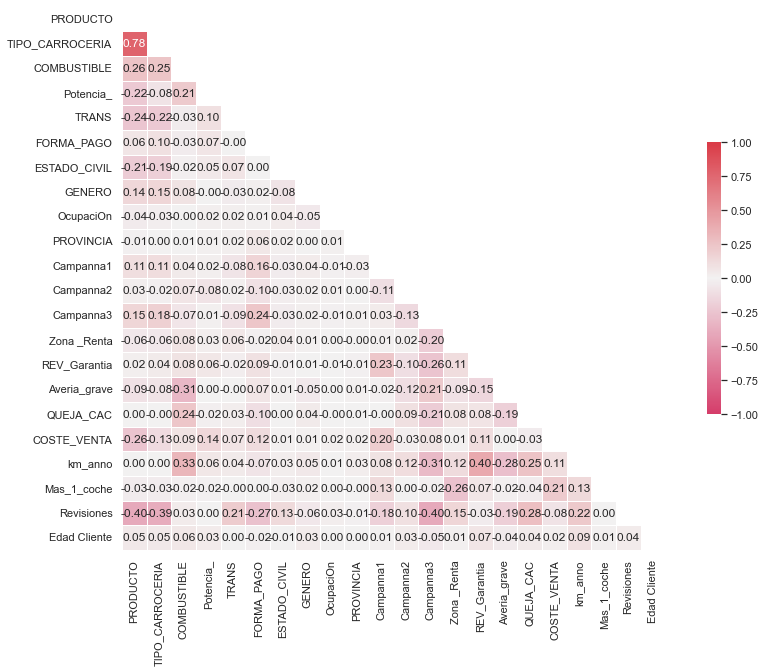

In [23]:
mapa_correlacion(car_data)

No observamos que haya columnas especialmente conflictivas, por lo que no es necesario eliminar ninguna columna de más.

Repetimos el mismo proceso en nuestro otro set de datos, que usaremos posteriormente para predecir qué clietes comprarán más de un coche.

In [25]:
# Creamos otro DataFrame de nuestros datos.
car_data_input = pd.read_csv('../data/cars_input.csv', sep=';')

Ambos DataFrames deben tener las mismas columnas. Eliminaremos las columnas que estén en `car_data_input` pero no estén en `car_data`.

In [26]:
# Identificamos columnas que están en car_data_input pero no en car_data.
columnas_diferentes = car_data_input.columns.difference(car_data.columns)

# Eliminamos esas columnas de car_data_input
car_data_input = car_data_input.drop(columns=columnas_diferentes)

Revisamos que no haya valores nulos en el nuevo DataFrame.

In [27]:
# Revisamos si hay valores nulos en nuestro DataFrame.
valores_nulos = car_data_input.isnull().sum()

# Mostramos los valores nulos.
valores_nulos

PRODUCTO              0
TIPO_CARROCERIA       0
COMBUSTIBLE           0
Potencia_             0
TRANS                 0
FORMA_PAGO            0
ESTADO_CIVIL        340
GENERO              327
OcupaciOn             0
PROVINCIA             0
Campanna1             0
Campanna2             0
Campanna3             0
Zona _Renta        5305
REV_Garantia          0
Averia_grave          1
QUEJA_CAC             0
COSTE_VENTA           0
km_anno               0
Revisiones            0
Edad Cliente          0
dtype: int64

Sustituimos los valores nulos por la moda.

In [28]:
# Función para sustituir los valores nulos en las columnas especificadas por la moda (valor más frecuente).
def valores_nulos(df, columnas):
    for columna in columnas:
        if columna in df.columns:  # Verificar si la columna existe en el DataFrame
            if df[columna].isnull().any():  # Solo si hay valores nulos
                try:
                    # Obtener la moda (valor más frecuente)
                    moda = df[columna].mode()[0]  # Usar [0] para seleccionar el primer valor en caso de múltiples modos
                    df[columna].fillna(moda, inplace=True)
                except IndexError:
                    print(f"No se pudo obtener la moda para la columna: {columna}")
            else:
                print(f"No hay valores nulos en la columna: {columna}")
        else:
            print(f"La columna '{columna}' no existe en el DataFrame")
    return df

# Aplicamos la función valores_nulos a car_data_input, no hace falta redefinir la variable columnas_nulos.
car_data_input = valores_nulos(car_data_input, columnas_nulos)

No hace falta que miremos si hay valores duplicados ya que este set de datos no servirá para entrenarlo El siguiente paso es categorizar ciertas las columnas.

In [29]:
# Ejemplo 1: Categorizar COSTE_VENTA.
car_data_input_sin_duplicados = categorizar_columnas(car_data_input, 'COSTE_VENTA', coste_bins, coste_labels)

# Ejemplo 2: Categorizar km_anno.
car_data_input_sin_duplicados = categorizar_columnas(car_data_input, 'km_anno', km_bins, km_labels)

# Ejemplo 3: Categorizar Edad Cliente.
car_data_input_sin_duplicados = categorizar_columnas(car_data_input, 'Edad Cliente', edad_bins, edad_labels)

Pasamos las variables categóricas a numéricas usando el mismo mapea que aplicamos al DataFrame anterior.

In [30]:
# Función que aplicará el mapeo a un nuevo DataFrame.
def aplicar_mapeo(df, mappings):
    for columna, mapeo in mappings.items():
        if columna in df.columns:  # Verifica que la columna exista en el nuevo DataFrame.
            df[columna] = df[columna].map(mapeo)  # Aplica el mapeo con map().
        else:
            print(f"Columna {columna} no encontrada en el DataFrame")
    return df

# Aplicamos el mapeo a car_data_input_sin_duplicados.
car_data_input = aplicar_mapeo(car_data_input, mappings)

Ahora debemos tener un DataFrame completamente numérico y sin valores nulos. 

In [31]:
car_data_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23230 entries, 0 to 23229
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PRODUCTO         23230 non-null  int32   
 1   TIPO_CARROCERIA  23230 non-null  int32   
 2   COMBUSTIBLE      23230 non-null  int32   
 3   Potencia_        23230 non-null  int32   
 4   TRANS            23230 non-null  int32   
 5   FORMA_PAGO       23230 non-null  int32   
 6   ESTADO_CIVIL     23230 non-null  int32   
 7   GENERO           23230 non-null  int32   
 8   OcupaciOn        23230 non-null  int32   
 9   PROVINCIA        23230 non-null  int32   
 10  Campanna1        23230 non-null  int32   
 11  Campanna2        23230 non-null  int32   
 12  Campanna3        23230 non-null  int32   
 13  Zona _Renta      23230 non-null  int32   
 14  REV_Garantia     23230 non-null  int32   
 15  Averia_grave     23230 non-null  int32   
 16  QUEJA_CAC        23230 non-null  int32  

Una vez echa la limpieza, exportamos nuestros datos modificados.

In [32]:
# Función para guardar un DataFrame en un archivo CSV.

def guardar_datos_fuera(df, nombre_archivo, carpeta='../data'):
    # Crear la carpeta si no existe.
    if not os.path.exists(carpeta):
        os.makedirs(carpeta)

    # Crear la ruta completa del archivo.
    ruta_archivo = os.path.join(carpeta, f"{nombre_archivo}.csv")

    # Guardar el DataFrame como un archivo CSV.
    df.to_csv(ruta_archivo, index=False)

    print(f"Archivo guardado en: {ruta_archivo}")
    return ruta_archivo

# Ejemplo de uso:
guardar_datos_fuera(car_data, 'car_data_clean')
guardar_datos_fuera(car_data_input, 'car_data_input_clean')

Archivo guardado en: ../data\car_data_clean.csv
Archivo guardado en: ../data\car_data_input_clean.csv


'../data\\car_data_input_clean.csv'

Además, exportamos la variabe `mappings` que nos será útil para interpretar los resultados de nuestra predicción.

In [33]:
# Guardar la variable en un archivo
with open('mappings.pkl', 'wb') as f:
    pickle.dump(mappings, f)